# 1. Import and Install Dependencies

## 1.1 Install Dependencies

## 1.2 Load Dependencies

In [66]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from keras.models import Sequential

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [67]:
CAPUCHIN_FILE = os.path.join('data','snoring', '1.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', 'not_snoring', '190419_165_st12_Silent_1_1.wav')

In [68]:
CAPUCHIN_FILE,NOT_CAPUCHIN_FILE

('data\\snoring\\1.wav', 'data\\not_snoring\\190419_165_st12_Silent_1_1.wav')

## 2.2 Build Dataloading Function

In [69]:
def load_wav_16k_mono(filename): # Converting audiofile in to 16hz and get single channel
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)   
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [70]:

#file_contents = tf.io.read_file(CAPUCHIN_FILE)
    # Decode wav (tensors by channels)   
#wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
#sample_rate
#len(wav)
#wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
#len(wav)

## 2.3 Plot Wave

In [71]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

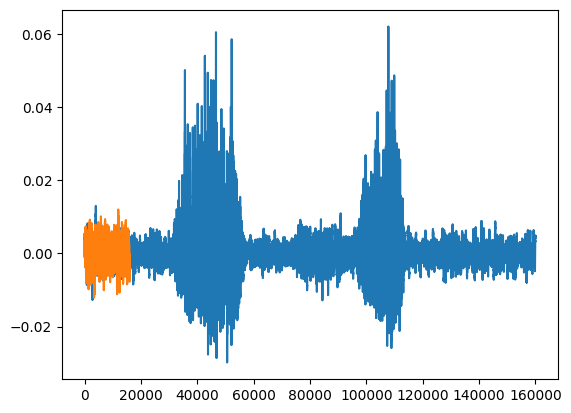

In [72]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [73]:
POS = os.path.join('data', 'snoring')
NEG = os.path.join('data', 'not_snoring')

## 3.2 Create Tensorflow Datasets

In [74]:
pos = tf.data.Dataset.list_files(POS+'\*.wav')
neg = tf.data.Dataset.list_files(NEG+'\*.wav')

In [75]:
pos.as_numpy_iterator().next()

b'data\\snoring\\Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_41_from_1658_sec_to_1666_sec.wav'

In [76]:
tf.ones(len(pos)),tf.ones(len(neg))


(<tf.Tensor: shape=(300,), dtype=float32, numpy=
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.,

## 3.3 Add labels and Combine Positive and Negative Samples

In [77]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [78]:
positives.as_numpy_iterator().next()
data.shuffle(100).as_numpy_iterator().next()
len(positives)
len(negatives)
#len(data)

682

## 4.1 Calculate Wave Cycle Length

In [79]:
lengths = []
count=0
for file in os.listdir(os.path.join('data', 'snoring')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'snoring', file))
    lengths.append(len(tensor_wave))
    count+=1
    #if count>383:
        #break

In [80]:
os.listdir(os.path.join('data', 'snoring'))

['1.wav',
 'Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_10_from_176_sec_to_228_sec_1.wav',
 'Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_10_from_176_sec_to_228_sec_10.wav',
 'Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_10_from_176_sec_to_228_sec_11.wav',
 'Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_10_from_176_sec_to_228_sec_12.wav',
 'Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_10_from_176_sec_to_228_sec_2.wav',
 'Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_10_from_176_sec_to_228_sec_3.wav',
 'Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_10_from_176_sec_to_228_sec_4.wav',
 'Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_10_from_176_sec_to_228_sec_5.wav',
 'Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_10_fr

In [81]:
count

300

In [82]:
lengths

[159997,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 159999,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 159999,
 127999,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 159999,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96000,
 96

## 4.2 Calculate Mean, Min and Max

In [83]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=99093>

In [84]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=63999>

In [85]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=159999>

In [86]:
63999/16000 # avg of anoring data of video

3.9999375

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [87]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [88]:
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav

<tf.Tensor: shape=(159997,), dtype=float32, numpy=
array([-1.0137098e-08,  8.0040401e-09,  1.9069120e-09, ...,
        4.4306824e-03,  4.2187735e-03,  4.2068055e-03], dtype=float32)>

## 5.2 Test Out the Function and Viz the Spectrogram

In [89]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [90]:
spectrogram, label = preprocess(filepath, label)
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[5.79495311e-01],
        [9.94638145e-01],
        [1.45578754e+00],
        ...,
        [1.33563626e-05],
        [1.23487753e-05],
        [5.24520874e-06]],

       [[1.12440479e+00],
        [1.28245676e+00],
        [1.48771322e+00],
        ...,
        [1.44197975e-05],
        [9.91701108e-06],
        [1.31130219e-06]],

       [[1.53419209e+00],
        [1.45709741e+00],
        [1.17102373e+00],
        ...,
        [1.51740651e-05],
        [1.12793032e-05],
        [2.38418579e-06]],

       ...,

       [[6.64354622e-01],
        [1.26324058e+00],
        [1.85687661e+00],
        ...,
        [1.02547710e-05],
        [1.35133075e-06],
        [3.75509262e-06]],

       [[4.14560288e-02],
        [1.24621093e+00],
        [2.17885351e+00],
        ...,
        [1.06044354e-05],
        [3.77208403e-06],
        [1.55903399e-06]],

       [[6.86029434e-01],
        [1.32817793e+00],
        [2.18239427e+00]

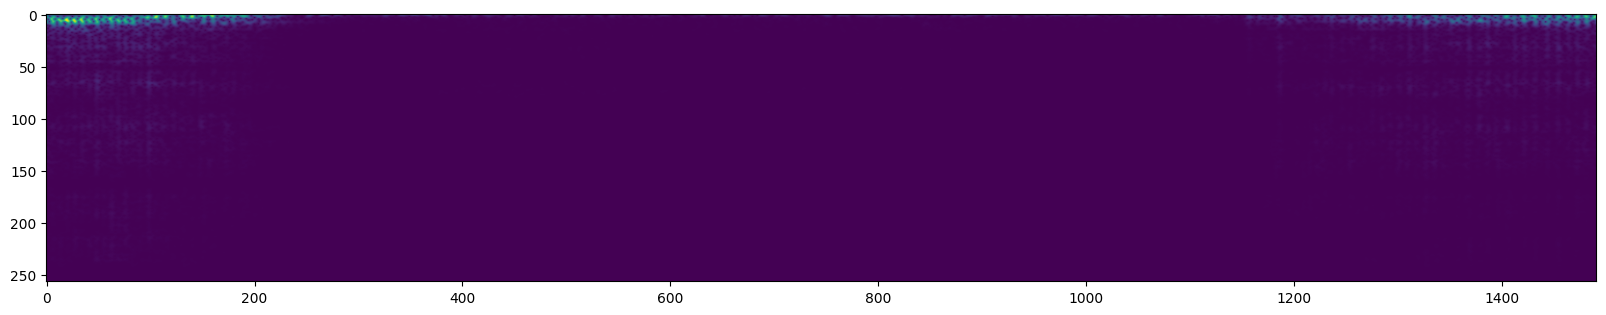

In [91]:
plt.figure(figsize=(20,10))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [92]:
data.as_numpy_iterator().next()

(b'data\\snoring\\Annotation_from_Ch_1_but_output_from_Ch_1_filename_190508_183_st12_SampleNo_24_from_850_sec_to_1184_sec_59.wav',
 1.0)

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [93]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

## 6.2 Split into Training and Testing Partitions

In [94]:
len(data)*.7

43.4

In [95]:
#

In [96]:
train = data.take(44)
test = data.skip(44).take(23)

## 6.3 Test One Batch

In [97]:
samples, labels = train.as_numpy_iterator().next()

In [98]:
samples.shape

(16, 1491, 257, 1)

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [162]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [164]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Accuracy()])

In [165]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 1489, 255, 64)     640       
                                                                 
 conv2d_11 (Conv2D)          (None, 1487, 253, 64)     36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 743, 126, 64)     0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5991552)           0         
                                                                 
 dense_12 (Dense)            (None, 128)               766918784 
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                      

## 7.3 Fit Model, View Loss and KPI Plots

In [166]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
 1/44 [..............................] - ETA: 58:11 - loss: 0.6920 - recall_7: 0.2500 - accuracy: 0.0000e+00

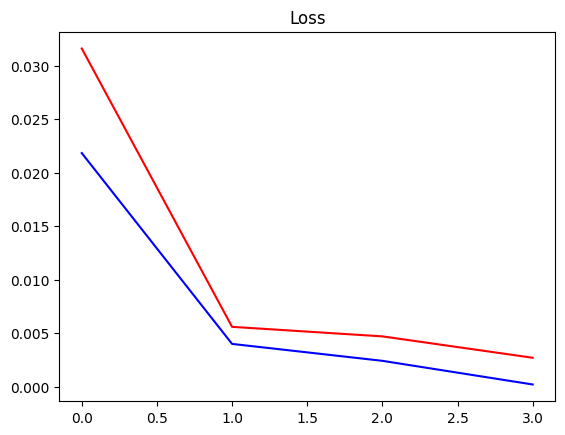

In [148]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

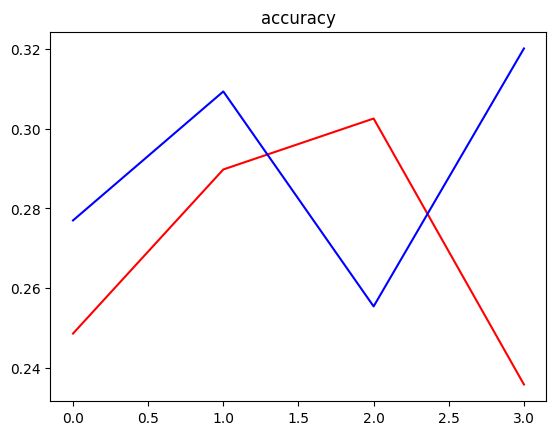

In [149]:
plt.title('accuracy')
plt.plot(hist.history['accuracy'], 'r')
plt.plot(hist.history['val_accuracy'], 'b')
plt.show()

KeyError: 'recall_1'

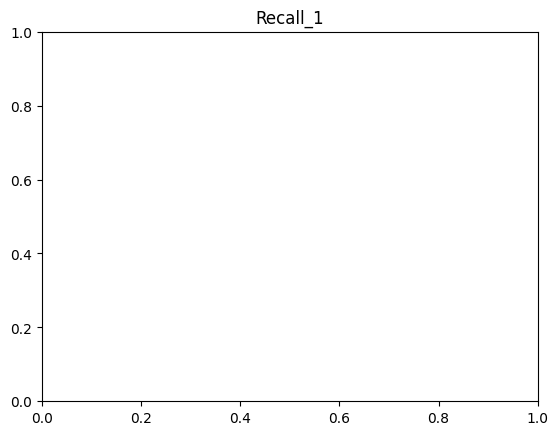

In [150]:
plt.title('Recall_1')
plt.plot(hist.history['recall_1'], 'r')
plt.plot(hist.history['val_recall_1'], 'b')
plt.show()

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [107]:
X_test, y_test = test.as_numpy_iterator().next()

In [108]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 171ms/step


## 8.2 Convert Logits to Classes 

In [109]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

In [110]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [111]:
mp3 = os.path.join('data', 'detect_snoring', 'recording_00.mp3')

In [112]:
wav = load_mp3_16k_mono(mp3)

In [113]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [114]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [115]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [116]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [141]:
yhat = model.predict(audio_slices)
yhat 
#yhat = [1 if prediction > 0.3 else 0 for prediction in yhat]

1/1 [==============================] - 0s 304ms/step


array([[0.98531854],
       [1.        ],
       [0.99999994],
       [0.8563359 ],
       [0.9999992 ],
       [0.0293164 ],
       [0.99999446],
       [0.04143458],
       [0.999999  ],
       [0.9980568 ],
       [1.        ],
       [0.9623788 ],
       [0.99999857],
       [0.99999577],
       [0.01908931],
       [0.9999651 ],
       [0.9986043 ],
       [1.        ],
       [0.95204186],
       [1.        ],
       [0.9999982 ],
       [1.        ]], dtype=float32)

In [142]:
import csv


In [144]:
with open('result.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording'])
    for key in yhat:
        writer.writerow([key])

## 9.4 Group Consecutive Detections

In [135]:
from itertools import groupby

In [139]:
yhat = [key for key, group in groupby(yhat)]
yhat
#calls = tf.math.reduce_sum(yhat).numpy()


[1, 0, 1, 0, 1, 0, 1]

In [137]:
calls

4

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [121]:
results = {}
for file in os.listdir(os.path.join('data', 'detect_snoring')):
    FILEPATH = os.path.join('data','detect_snoring', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

1/1 [==============================] - 0s 281ms/step


In [122]:
results

{'recording_00.mp3': array([[4.7043832e-03],
        [7.0470758e-03],
        [9.8258340e-01],
        [7.5803713e-05],
        [2.5357438e-02],
        [2.5805712e-04],
        [2.2757133e-04],
        [5.1007535e-02],
        [3.1508107e-04],
        [3.1719783e-01],
        [1.9322200e-05],
        [1.4197583e-01],
        [1.1367285e-04],
        [9.9999887e-01],
        [9.4733405e-01],
        [9.6024776e-01],
        [6.4349556e-01],
        [9.9996889e-01],
        [9.9676514e-01],
        [9.9999350e-01],
        [9.9987268e-01],
        [1.5168231e-03],
        [9.9999857e-01],
        [1.1483893e-05],
        [1.2393756e-03],
        [9.9905688e-01],
        [5.6403520e-04],
        [9.9999946e-01],
        [9.9384928e-01],
        [9.9996722e-01]], dtype=float32),
 'recording_01.mp3': array([[0.00879991],
        [0.26661402],
        [0.00312388],
        [0.00665168],
        [0.77479964],
        [0.00242635],
        [0.09279201],
        [0.01558406],
        [0.016632

## 10.2 Convert Predictions into Classes

In [123]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_00.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  1],
 'recording_01.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_03.mp3': [1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
 'recording_04.mp3': [0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0],
 'recording_05.mp3': [1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0],
 'recording_06.mp3': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'recording_07.mp3': [0,
  0,
  0,
  0,
  0,

## 10.3 Group Consecutive Detections

In [124]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_00.mp3': 5,
 'recording_01.mp3': 0,
 'recording_03.mp3': 3,
 'recording_04.mp3': 8,
 'recording_05.mp3': 7,
 'recording_06.mp3': 1,
 'recording_07.mp3': 0,
 'recording_08.mp3': 7}

# 11. Export Results

In [125]:
import csv

In [126]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])